In [51]:
import os
import platform
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [52]:
# cargar los datos
file_path = 'https://raw.githubusercontent.com/NicolasLascours/Predicci-n-de-Diabetes/master/diabetes.csv'  # ruta del archivo CSV en GitHub

try:
    # descargar el archivo si no existe localmente
    if os.access(file_path, os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl -LJO "{file_path}"
        else:
            response = requests.get(file_path)
            with open(os.path.basename(file_path), 'wb') as file:
                file.write(response.content)

    # cargar los datos en un DataFrame
    diabetes_dataset = pd.read_csv(file_path, delimiter=',', encoding='utf-8', error_bad_lines=False)
    print(diabetes_dataset.head())

except pd.errors.ParserError as e:
    print("Error al leer el archivo CSV:", str(e))
except pd.errors.EmptyDataError as e:
    print("Error al leer el archivo CSV:", str(e))


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23105  100 23105    0     0  84277      0 --:--:-- --:--:-- --:--:-- 85258
C:\Users\User\AppData\Local\Temp\ipykernel_9624\2992365279.py:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  diabetes_dataset = pd.read_csv(file_path, delimiter=',', encoding='utf-8', error_bad_lines=False)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [53]:
#información estadística 
des = diabetes_dataset.describe()
des.loc['Nan'] = diabetes_dataset.isna().sum()
des.loc['%Nan'] = (diabetes_dataset.isna().mean())*100
des

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
#Muestro los 5 primeros elementos de dataset
diabetes_dataset.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [55]:
#cantidad de filas y columnas
diabetes_dataset.shape

(768, 9)

In [56]:
#cantidad de diabéticos (1) y no diabéticos (0) en el dataset
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

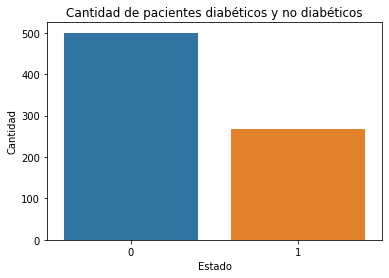

In [57]:
#Crear diagrama de barras
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Cantidad de pacientes diabéticos y no diabéticos')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

In [58]:
#el % de glucosa en sangre en diabéticos es mayor que los que no lo son.
#A su vez, la personas de mayor edad son más suceptibles a tener diabetes.
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


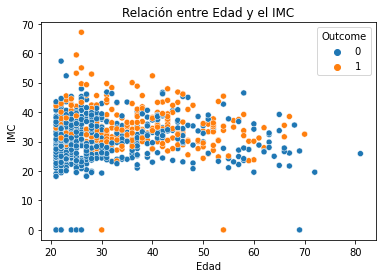

In [59]:
# gráfico de dispersión que indica la relación entre la edad y el IMC de los pacientes diabéticos y no diabéticos
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=diabetes_dataset)
plt.title('Relación entre Edad y el IMC')
plt.xlabel('Edad')
plt.ylabel('IMC')
plt.show()


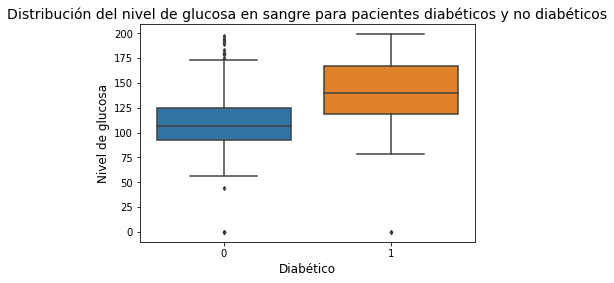

<Figure size 576x432 with 0 Axes>

In [60]:
# diagrama de cajas y bigotes que compara la distribución del nivel de glucosa en sangre entre pacientes diabéticos
#y no diabéticos en el conjunto de datos. 
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_dataset, fliersize=3)
plt.title('Distribución del nivel de glucosa en sangre para pacientes diabéticos y no diabéticos', fontsize=14)
plt.xlabel('Diabético', fontsize=12)
plt.ylabel('Nivel de glucosa', fontsize=12)
plt.figure(figsize=(8,6))
plt.show()

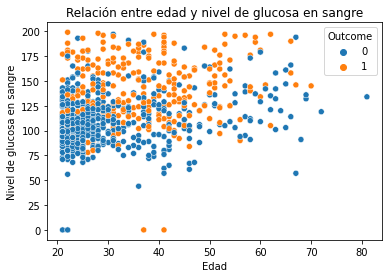

In [61]:
# gráfico de dispersión que indica la relación entre la edad y el nivel de glucosa en sangre de los pacientes diabéticos y no diabéticos
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_dataset)
plt.title('Relación entre edad y nivel de glucosa en sangre')
plt.xlabel('Edad')
plt.ylabel('Nivel de glucosa en sangre')
plt.show()

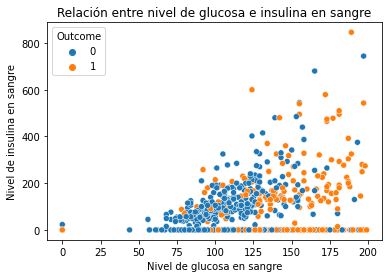

In [62]:
# gráfico de dispersión que indica la relación entre la insulina y el nivel de glucosa en sangre de los pacientes diabéticos y no diabéticos
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=diabetes_dataset)
plt.title('Relación entre nivel de glucosa e insulina en sangre')
plt.xlabel('Nivel de glucosa en sangre')
plt.ylabel('Nivel de insulina en sangre')
plt.show()

In [63]:
# Me quedo con las columnas relevantes y las traduzco al español
diabetes_df_limpio = diabetes_dataset.loc[:, ['Age', 'Glucose', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Outcome']]
diabetes_df_limpio = diabetes_df_limpio.rename(columns={
    'Age': 'Edad',
    'Glucose': 'Glucosa',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'Historial Familiar de Diabetes',
    'Outcome': 'Resultado'
})

diabetes_df_limpio

,Edad,Glucosa,Insulina,IMC,Historial Familiar de Diabetes,Resultado
0,50,148,0,33.6,0.627,1
1,31,85,0,26.6,0.351,0
2,32,183,0,23.3,0.672,1
3,21,89,94,28.1,0.167,0
4,33,137,168,43.1,2.288,1
...,...,...,...,...,...,...
763,63,101,180,32.9,0.171,0
764,27,122,0,36.8,0.340,0
765,30,121,112,26.2,0.245,0
766,47,126,0,30.1,0.349,1


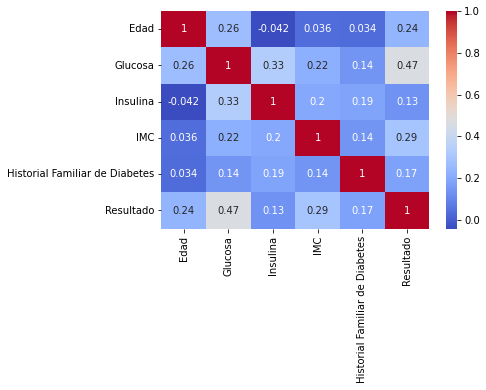

In [64]:
#matriz de correlación entre las variables
corr = diabetes_df_limpio.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

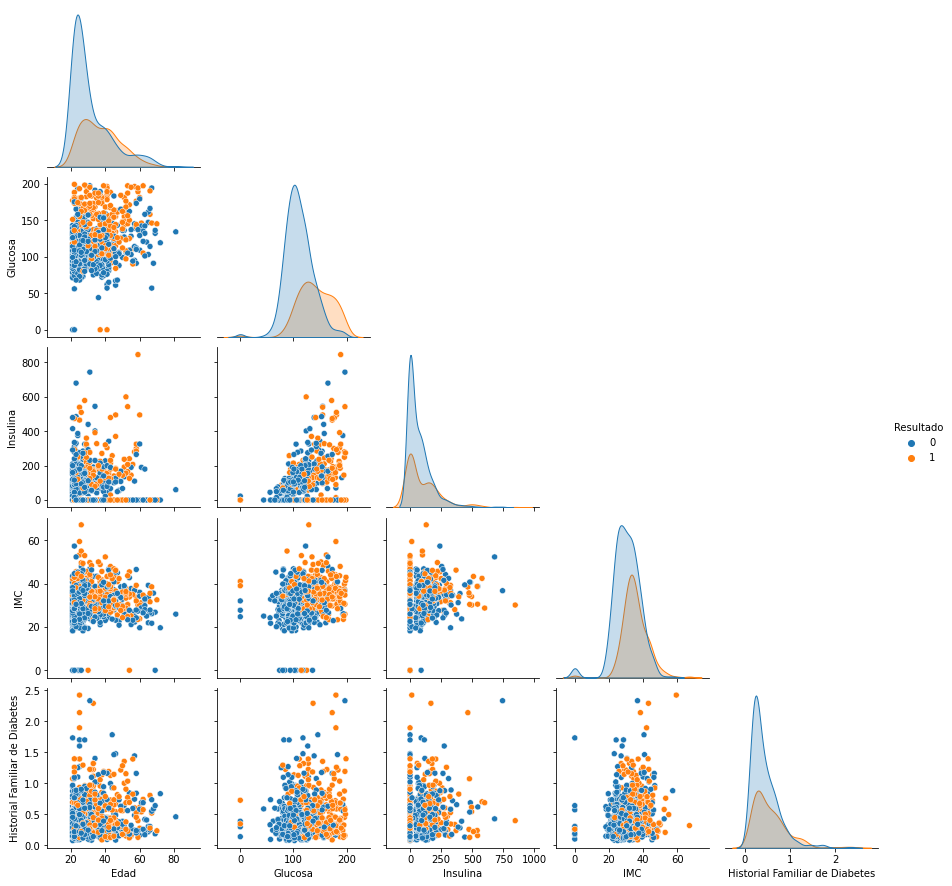

In [65]:
sns.pairplot(data=diabetes_df_limpio, hue='Resultado', corner=True)

In [66]:
#separo los datos y los labels
x = diabetes_df_limpio.drop(columns='Resultado', axis=1).values
y = diabetes_df_limpio['Resultado'].values

In [67]:
# divido los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [68]:
# normalizo los datos de entrenamiento y transformo los datos de prueba en la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Creo el modelo Random Forest y lo ajusto a los datos de entrenamiento
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evalúo el modelo en los datos de prueba
score = model.score(X_test, y_test)

# Imprimo la precisión del modelo
print(f'Precisión del modelo Random Forest: {score:.3f}')

Precisión del modelo Random Forest: 0.753


In [70]:
# Creo el modelo KNN y ajusto a los datos de entrenamiento
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Evalúo el modelo en los datos de prueba
score = model.score(X_test, y_test)

# Imprimo la precisión del modelo
print(f'Precisión del modelo KNN: {score:.3f}')


Precisión del modelo KNN: 0.727


In [81]:
# Creo los widgets de entrada
glucosa = widgets.FloatText(description='Glucosa (mg/dL):')
insulina = widgets.FloatText(description='Insulina (mu U/mL):')
imc = widgets.FloatText(description='IMC:')
pedigri = widgets.FloatText(description='Pedigrí:')
edad = widgets.FloatText(description='Edad (años):')

# Función para reiniciar los campos de entrada
def reiniciar_campos():
    edad.value = None
    glucosa.value = None
    insulina.value = None
    imc.value = None
    pedigri.value = None

# Creo los objetos de los modelos
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

# Ajusto los modelos a los datos de entrenamiento
random_forest_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Creo una función que se activa cuando se presiona el botón de "Predecir"
def predecir(sender):
    try:
        # Comprobar que los valores ingresados son válidos
        if edad.value <= 0 or glucosa.value <= 0 or insulina.value < 0 or imc.value <= 0 or pedigri.value < 0:
            print("Error: Asegúrese de ingresar valores válidos")
            return

        input_data = np.array([edad.value, glucosa.value, insulina.value, imc.value, pedigri.value])

        # Cambio la forma del arreglo ya que estoy realizando una predicción para una única instancia de datos
        input_data_reshaped = input_data.reshape(1, -1)

        # Estandarizo la entrada
        std_data = scaler.transform(input_data_reshaped)

        # Hago una predicción en los datos estandarizados
        random_forest_prediction = random_forest_model.predict(std_data)
        random_forest_proba = random_forest_model.predict_proba(std_data)
        knn_prediction = knn_model.predict(std_data)
        knn_proba = knn_model.predict_proba(std_data)

        if random_forest_prediction[0] != knn_prediction[0]:
         print("Las predicciones de los modelos son contradictorias. Se requiere una evaluación más de un experto en el dominio.")

        # Imprimo la predicción y la probabilidad estimada para Random Forest
        print('----------------------------------------')
        if random_forest_prediction[0] == 0:
            print('Random Forest: NO DIABÉTICO.')
        else:
            print('Random Forest: DIABÉTICO.')
        print(f"Probabilidad estimada de no tener diabetes: {random_forest_proba[0][0]:.3f}")
        print(f"Probabilidad estimada de tener diabetes: {random_forest_proba[0][1]:.3f}")
        print('----------------------------------------')

        # Imprimo la predicción y la probabilidad estimada para KNN
        print('----------------------------------------')
        if knn_prediction[0] == 0:
            print('KNN: NO DIABÉTICO')
        else:
            print('KNN: DIABÉTICO.')
        print(f"Probabilidad estimada de no tener diabetes: {knn_proba[0][0]:.3f}")
        print(f"Probabilidad estimada de tener diabetes: {knn_proba[0][1]:.3f}")
        print('----------------------------------------')

        # Imprimo los valores ingresados
        print(f"Edad: {edad.value} años")
        print(f"Nivel de glucosa en sangre: {glucosa.value} mg/dL")
        print(f"Nivel de insulina en sangre: {insulina.value} mu U/mL")
        print(f"Índice de masa corporal (IMC): {imc.value}")
        print(f"Pedigrí de diabetes en la familia: {pedigri.value}")
        print('----------------------------------------')

    except:
        print("Error: Asegúrese de ingresar números en todas las entradas")

# Creo el botón de "Predecir"
boton_predecir = widgets.Button(description='Predecir')
boton_predecir.on_click(predecir)

# Muestro los widgets y el botón
display(edad, glucosa, insulina, imc, pedigri, boton_predecir)



FloatText(value=0.0, description='Edad (años):')

FloatText(value=0.0, description='Glucosa (mg/dL):')

FloatText(value=0.0, description='Insulina (mu U/mL):')

FloatText(value=0.0, description='IMC:')

FloatText(value=0.0, description='Pedigrí:')

Button(description='Predecir', style=ButtonStyle())